# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [2]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

import pickle
from moveoverlib.functions import *

%matplotlib inline

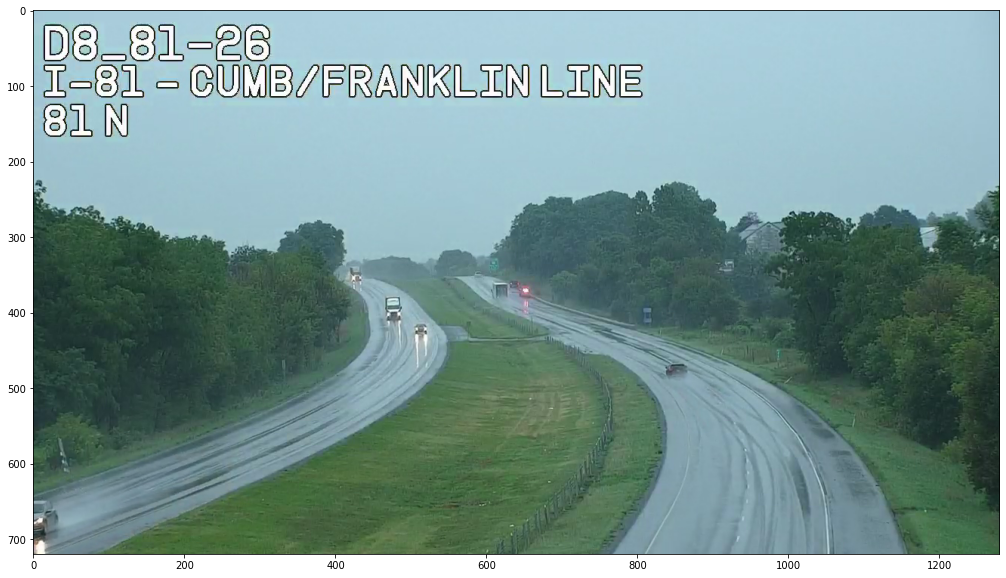

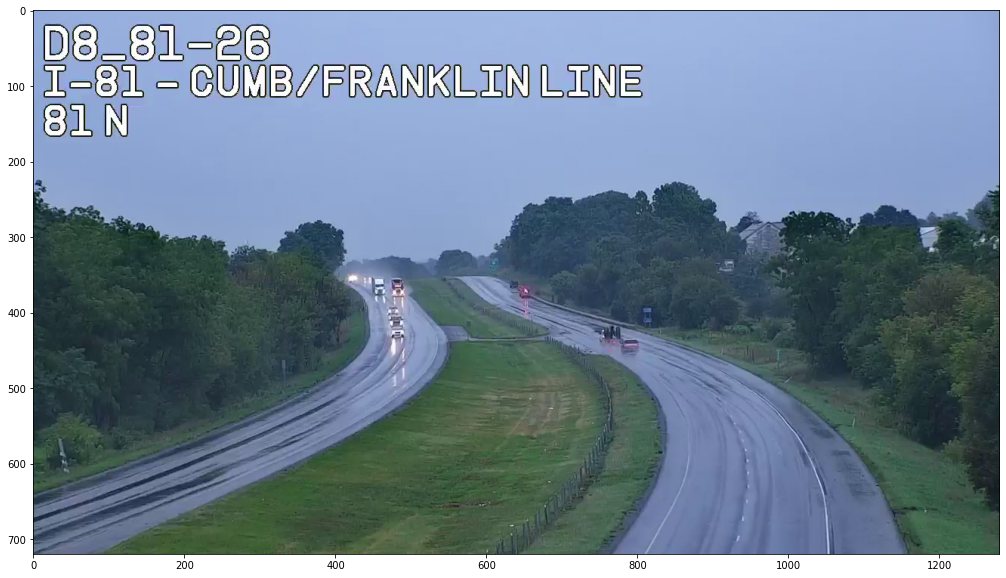

In [3]:
DATA_PATH = '../data/{}'.format(os.getcwd().split('/')[-1])
pathlib.Path(DATA_PATH).mkdir(parents=True, exist_ok=True)

VIDEO_FILE = '/data/MoveOver/Videos/PA/June 2021/D8_81-26-2021-09-05 FHWA.mp4'

pickle.dump(VIDEO_FILE, open(f'{DATA_PATH}/videopath.p', 'wb'))

# Create folder for images
pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)

# Extract frames
extractFrame(VIDEO_FILE, frameno = 15*70, dest_file = './images/frame_view1.jpg');
extractFrame(VIDEO_FILE, frameno = 20*60*2, dest_file = './images/frame_view2.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [4]:
SRC = np.float32([
    [798, 422], # 
    [731, 456], # 
    [551, 439], # 
    [539, 418], # 
    [582, 434], # 
    [688, 425]  # 
])

DST = np.float32([
    [4392, 1076], # 
    [3524, 1767], # 
    [3847, 1173], # 
    [4555, 435], # 
    [4020, 1057], # 
    [4119, 1125] # 
])



print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



  "cameraPoints" : [[798, 422], [731, 456], [551, 439], [539, 418]],
  "birdEyePoints" : [[4392, 1076], [3524, 1767], [3847, 1173], [4555, 435]],


In [5]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

[798. 422.] -> [4392. 1076.]
[731. 456.] -> [3524. 1767.]
[551. 439.] -> [3847. 1173.]
[539. 418.] -> [4555.  435.]
[582. 434.] -> [4001.1858 1078.1675]
[688. 425.] -> [4295.8     986.1269]


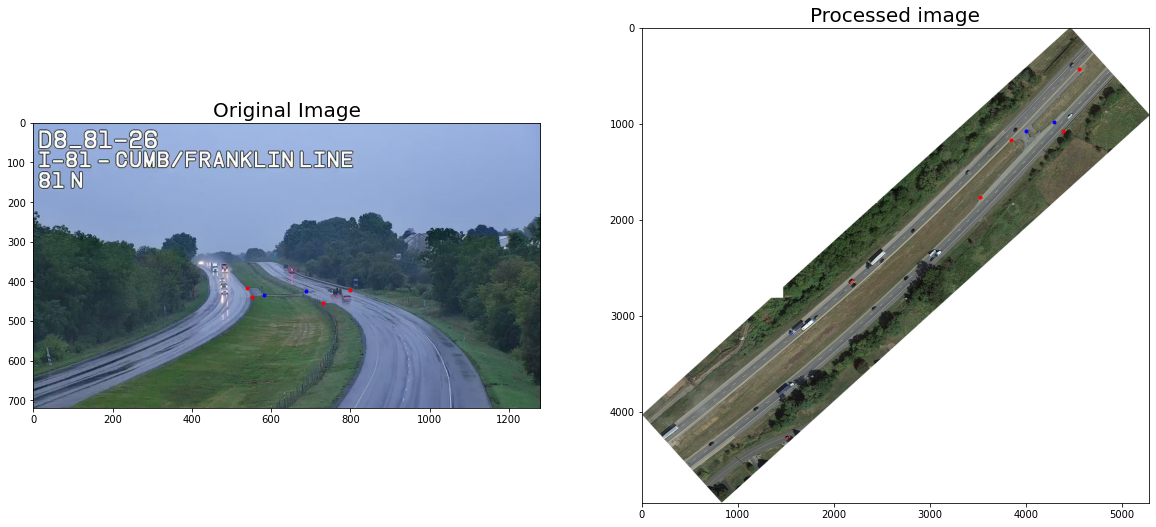

In [6]:
map_file = './images/SkyView.jpg'
ret = displayPoints(SRC, M, './images/frame_view2.jpg', map_file)

[4392. 1076.] -> [798. 422.]
[3524. 1767.] -> [731. 456.]
[3847. 1173.] -> [551. 439.]
[4555.  435.] -> [539. 418.]
[4020. 1057.] -> [580.6287  433.35898]
[4119. 1125.] -> [671.9927  430.69073]


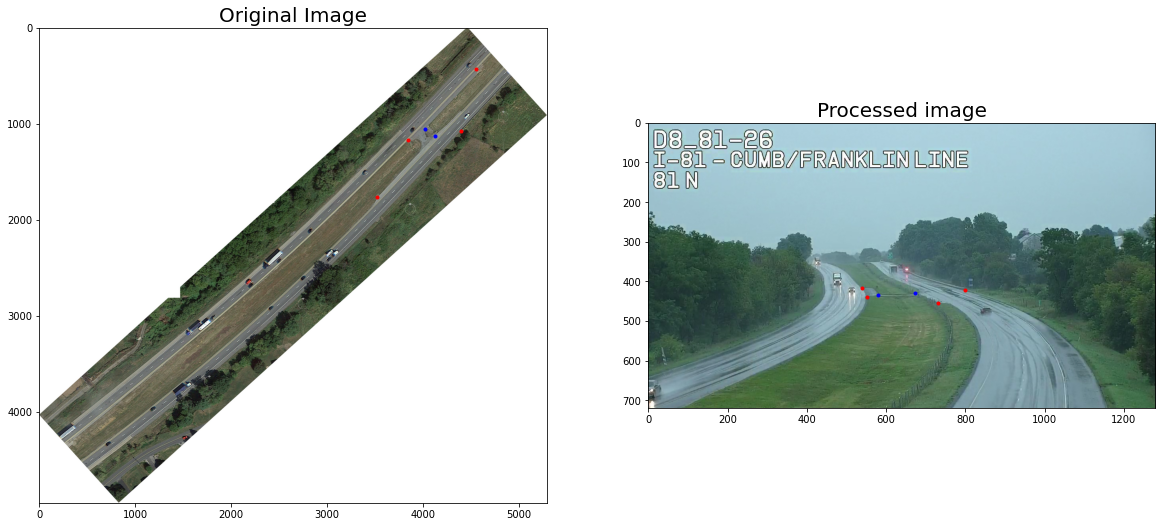

In [7]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_view1.jpg')

# Lane masks

In [8]:
MASK_PATH = './images/mask.png'

(array([  0,  26,  51,  77, 102, 128, 153]),
 array([867314,  22398,   1660,    337,  25461,   3264,   1166]))

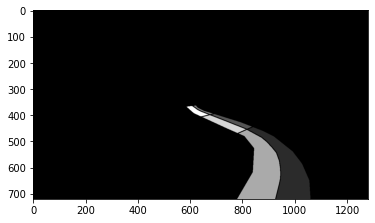

In [9]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

### Processing mask
Tamper with this code and run it, if something is wrong with the mask

In [ ]:
order = np.argsort(unique[1])[::-1]
unique_sorted = (unique[0][order], unique[1][order])
print (unique_sorted)

In [ ]:
mask[~np.isin(mask, (10, 20, 30, 40, 50))] = 0
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [ ]:
tmp = mask.copy()
tmp[tmp!=50] = 0
plt.imshow(tmp, cmap='gray')

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)